In [201]:
import pandas as pd

# Define the path to your CSV file
filepath = r'C:\Users\200408\OneDrive - Betonmast\Dokumenter\BridgeHerøysund\Strain_results_undammaged.csv'

# Skip the first and third rows, and use the second row as column names
df = pd.read_csv(filepath, skiprows=[0, 2])
# Remove rows 0 to 23
df = df.drop(range(0, 48))

# Remove columns "case", "case-id", and "layer"
columns_to_drop = ["case-id", "case-value", "layer", "element", "X", "Y", "Z"]
df = df.drop(columns=columns_to_drop)

# Extract the number from the 'case' column
df['case'] = df['case'].str.extract('(\d+)')

# Convert the extracted string to a number
df['case'] = pd.to_numeric(df['case'])


# Check the first few rows to ensure it loaded correctly
display(df)


,case,node,EXX
48,3,92301,-0.000329
49,3,92301,-0.000329
50,3,92190,-0.000318
51,3,92190,-0.000318
52,3,92301,-0.000328
...,...,...,...
4843,202,102105,-0.000288
4844,202,104439,-0.000323
4845,202,104439,-0.000323
4846,202,104439,-0.000323


In [202]:
sored_df = df.sort_values(by=["node", "case"])


# Group the DataFrame by the node column (assuming the node column is named 'node')
grouped = df.groupby('node')

# Create a dictionary to store each DataFrame
dfs = {}

# For each group, create a new DataFrame
for node, group in grouped:
    dfs[node] = group

Point_5_S = dfs[92190]
Point_3_N = dfs[92301]
Point_4_S = dfs[96029]
Point_1_N = dfs[99217]
Point_2_N = dfs[102105]
Point_6_S = dfs[104439]

display(Point_5_S)
display(Point_3_N)
display(Point_4_S)
display(Point_1_N)
display(Point_2_N)
display(Point_6_S)

,case,node,EXX
50,3,92190,-0.000318
51,3,92190,-0.000318
54,3,92190,-0.000319
55,3,92190,-0.000319
74,4,92190,-0.000315
...,...,...,...
4807,201,92190,-0.000309
4826,202,92190,-0.000334
4827,202,92190,-0.000334
4830,202,92190,-0.000335


,case,node,EXX
48,3,92301,-0.000329
49,3,92301,-0.000329
52,3,92301,-0.000328
53,3,92301,-0.000328
72,4,92301,-0.000323
...,...,...,...
4805,201,92301,-0.000319
4824,202,92301,-0.000345
4825,202,92301,-0.000345
4828,202,92301,-0.000345


,case,node,EXX
56,3,96029,-0.000365
57,3,96029,-0.000365
58,3,96029,-0.000365
59,3,96029,-0.000365
80,4,96029,-0.000363
...,...,...,...
4811,201,96029,-0.000356
4832,202,96029,-0.000382
4833,202,96029,-0.000382
4834,202,96029,-0.000382


,case,node,EXX
60,3,99217,-0.000292
61,3,99217,-0.000293
62,3,99217,-0.000292
63,3,99217,-0.000292
84,4,99217,-0.000287
...,...,...,...
4815,201,99217,-0.000282
4836,202,99217,-0.000308
4837,202,99217,-0.000308
4838,202,99217,-0.000307


,case,node,EXX
64,3,102105,-0.000275
65,3,102105,-0.000275
66,3,102105,-0.000276
67,3,102105,-0.000276
88,4,102105,-0.000269
...,...,...,...
4819,201,102105,-0.000263
4840,202,102105,-0.000288
4841,202,102105,-0.000287
4842,202,102105,-0.000288


,case,node,EXX
68,3,104439,-0.000312
69,3,104439,-0.000312
70,3,104439,-0.000311
71,3,104439,-0.000312
92,4,104439,-0.000307
...,...,...,...
4823,201,104439,-0.000299
4844,202,104439,-0.000323
4845,202,104439,-0.000323
4846,202,104439,-0.000323


In [203]:
    
def calculate_average_EXX(point):
# Group the DataFrame by the 'case-value' column
    grouped = point.groupby('case')

    # Calculate the mean of the 'EXX' column for each group
    averaged_EXX = grouped['EXX'].mean()


    return averaged_EXX

Point_S_5_mean = calculate_average_EXX(Point_5_S)
Point_3_N_mean = calculate_average_EXX(Point_3_N)
Point_4_S_mean = calculate_average_EXX(Point_4_S)
Point_1_N_mean = calculate_average_EXX(Point_1_N)
Point_2_N_mean = calculate_average_EXX(Point_2_N)
Point_6_S_mean = calculate_average_EXX(Point_6_S)


In [204]:
# Create a list of the DataFrames
dataframes = [Point_1_N_mean, Point_2_N_mean, Point_3_N_mean, Point_4_S_mean, Point_S_5_mean, Point_6_S_mean]

# Use pd.concat to combine them into one DataFrame
combined_df = pd.concat(dataframes, axis=1)

# Set the column names
combined_df.columns = ['Point_1_N_mean', 'Point_2_N_mean', 'Point_3_N_mean', 'Point_4_S_mean', 'Point_5_S_mean', 'Point_6_S_mean']

# Display the result
display(combined_df)
print(combined_df)

,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean
case,,,,,,
3,-0.000292,-0.000276,-0.000329,-0.000365,-0.000318,-0.000312
4,-0.000286,-0.000269,-0.000323,-0.000362,-0.000316,-0.000307
5,-0.000283,-0.000266,-0.000320,-0.000361,-0.000313,-0.000305
6,-0.000282,-0.000264,-0.000318,-0.000360,-0.000313,-0.000304
7,-0.000281,-0.000264,-0.000318,-0.000360,-0.000313,-0.000303
...,...,...,...,...,...,...
198,-0.000282,-0.000262,-0.000318,-0.000355,-0.000307,-0.000297
199,-0.000282,-0.000263,-0.000320,-0.000356,-0.000308,-0.000298
200,-0.000283,-0.000264,-0.000320,-0.000356,-0.000309,-0.000299


      Point_1_N_mean  Point_2_N_mean  Point_3_N_mean  Point_4_S_mean  \
case                                                                   
3          -0.000292       -0.000276       -0.000329       -0.000365   
4          -0.000286       -0.000269       -0.000323       -0.000362   
5          -0.000283       -0.000266       -0.000320       -0.000361   
6          -0.000282       -0.000264       -0.000318       -0.000360   
7          -0.000281       -0.000264       -0.000318       -0.000360   
...              ...             ...             ...             ...   
198        -0.000282       -0.000262       -0.000318       -0.000355   
199        -0.000282       -0.000263       -0.000320       -0.000356   
200        -0.000283       -0.000264       -0.000320       -0.000356   
201        -0.000282       -0.000263       -0.000320       -0.000356   
202        -0.000307       -0.000288       -0.000345       -0.000382   

      Point_5_S_mean  Point_6_S_mean  
case                    

In [205]:
# Loop through each column to micrometers/meters
for column in combined_df.columns:
    # Multiply the values by 1,000,000
    combined_df[column] = combined_df[column] * 1_000_000

# Display the DataFrame
display(combined_df)

,Point_1_N_mean,Point_2_N_mean,Point_3_N_mean,Point_4_S_mean,Point_5_S_mean,Point_6_S_mean
case,,,,,,
3,-292.25,-275.50,-328.50,-365.00,-318.50,-311.75
4,-286.50,-269.50,-323.00,-362.50,-315.50,-307.50
5,-283.25,-266.00,-319.50,-361.00,-313.50,-304.75
6,-281.50,-264.50,-318.25,-360.00,-313.25,-303.50
7,-281.25,-264.00,-317.75,-360.00,-312.50,-303.00
...,...,...,...,...,...,...
198,-281.50,-262.00,-318.50,-354.75,-307.50,-297.00
199,-282.50,-263.00,-319.75,-355.50,-308.50,-298.00
200,-283.25,-263.50,-320.00,-356.00,-308.75,-298.75


case
3        0
4        1
5        2
6        3
7        4
      ... 
198    195
199    196
200    197
201    198
202    199
Name: hours, Length: 200, dtype: int32


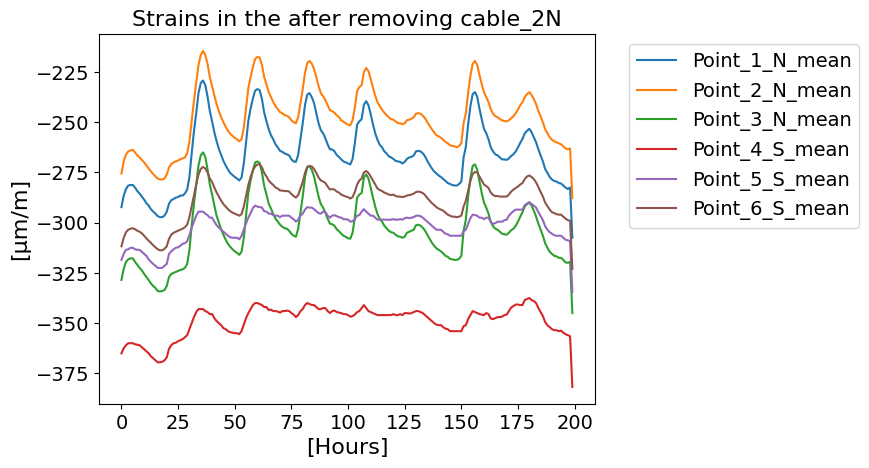

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new column 'hours' with a range from 0 to 199
combined_df['hours'] = np.arange(0, 200)

# Print the 'hours' column
print(combined_df['hours'])

# Set 'hours' as the index of the DataFrame
combined_df.set_index('hours', inplace=True)

# Plot the DataFrame
combined_df.plot()

# Set the x and y labels
plt.xlabel('[Hours]', fontsize=16)
plt.ylabel('[µm/m]', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.title('Strains in the after removing cable_2N', fontsize=16)

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)


# Show the plot
plt.show()

In [207]:
# Specify the filepath
filepath = r'C:\Users\200408\repos\HeroysundBridge-ML\Utilities\Diana_scripts/diana_no_damage_df.parquet'

# Save the DataFrame as a Parquet file
combined_df.to_parquet(filepath)